# Implementación del Algoritmo de Descenso de Gradiente

Para el desarrollo de este laboratorio, se implementó el algoritmo a partir del siguiente pseudocódigo:

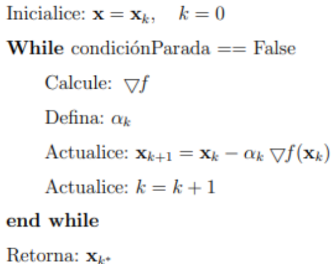

Se estableció como condición de parada que la norma del vector gradiente sea menor a $10^{-5}$. De esta manera, no se limita al algoritmo a que finalice después de un número determinado de iteraciones inicialmente (pues buscamos priorizar la precisión y exactitud de los resultados). Sin embargo, se establece un tope máximo de iteraciones en 1000 que detiene el algoritmo en caso que no sea convergente.

In [ ]:
import numpy as np

# Instalar desde la terminal Shell la librería para sacar gradiente
!pip install numdifftools
import numdifftools as nd

def descenso_gradiente(funcion, alpha, inicial):
  # Definir una estructura de datos vacía para almacenar los puntos x_k
  x_k = [inicial]
  # Definir variables locales para almacenar la información necesaria
  punto = inicial
  norma = 1000
  k = 0
  while norma > 1e-5 and k < 1000:
    # Calcular el gradiente de la función suministrada
    grad = nd.Gradient(funcion)(punto)
    norma = np.sqrt(grad[0]**2 + grad[1]**2)
    # Establecer el paso de actualización de la iteración
    actualizador = [-alpha*i for i in grad]
    # Actualizar el punto de enfoque minimizador de la iteración actual
    punto = [punto[i]+actualizador[i] for i in range(len(punto))]
    # Guardar el punto en la estructura de datos
    x_k.append(punto)
    k += 1
  # Retornar el listado de puntos del algoritmo
  return x_k

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 966.2 kB/s eta 0:00:00


#Prueba del Algoritmo

## Función 1

Se define la función polinomial de segundo grado $f(\vec{x})=\vec{x}^TQ\vec{x}+\vec{b}^T\vec{x}+C$ con los siguientes parámetros:

$$Q=\begin{bmatrix}1 & 0 \\ 0 & 2\end{bmatrix}$$
$$\vec{b}=\begin{bmatrix} \frac{1}{2} \\ 0\end{bmatrix}$$
$$C = 5$$

Es decir, si las variables son $\vec{x}=\begin{bmatrix}x & y\end{bmatrix}^T$, entonces la función es $f(x,y)=x^2+2y^2+\frac{1}{2}x+5$.

Procedemos a aplicar el algoritmo de descenso de gradiente desde el punto inicial $\vec{x_0}=(3,3)$ y con pasos constantes de actualización $\alpha=0.1, 0.3, 0.8, 1.1$, como se muestra a continuación:

In [ ]:
# Definir un listado con los parámetros que se hacen variar
listado_alpha = [0.1, 0.3, 0.8, 1.1]
listado_trayectorias = []

# Definir una función que implemente la polinómica dada
def polinomica(x):
  return x[0]**2 + 2*x[1]**2 + 0.5*x[0] + 5

# Obtener las trayectorias seguidas por el algoritmo en cada caso
for a in listado_alpha:
  xk_descenso = descenso_gradiente(polinomica, a, [3,3])
  listado_trayectorias.append(xk_descenso)
  print("Para Alpha=" + str(a) + ", el mínimo que arroja el algoritmo está en (x,y)=" + str(xk_descenso[-1]))


Para Alpha=0.1, el mínimo que arroja el algoritmo está en (x,y)=[-0.2499960155115925, 8.788087119317708e-14]
Para Alpha=0.3, el mínimo que arroja el algoritmo está en (x,y)=[-0.2499986041356285, 1.96636131999645e-11]
Para Alpha=0.8, el mínimo que arroja el algoritmo está en (x,y)=[-0.24161465684577732, -7595028728949376.0]
Para Alpha=1.1, el mínimo que arroja el algoritmo está en (x,y)=[-49.259794473347725, -6704867961812547.0]


A continuación, procedemos a graficar para cada caso de $\alpha$ el trayecto seguido por el algoritmo de descenso de gradiente sobre las curvas de nivel de la función analizada. Los resultados son los siguientes:

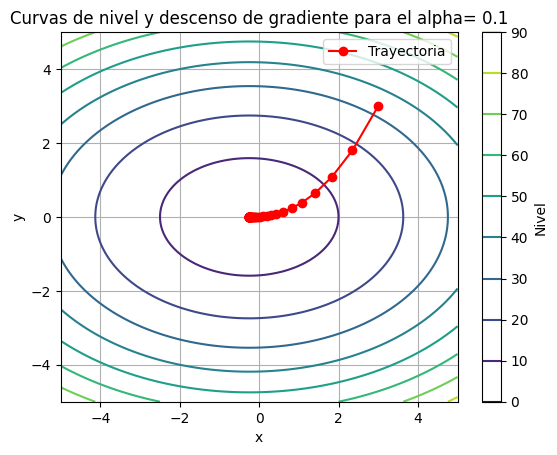

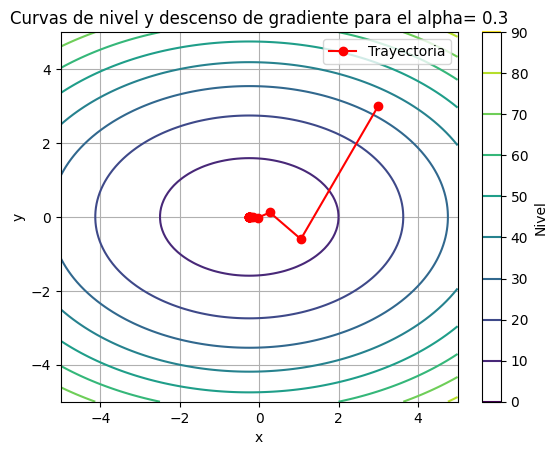

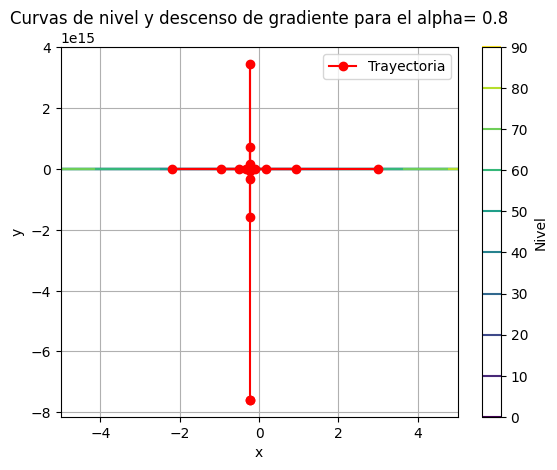

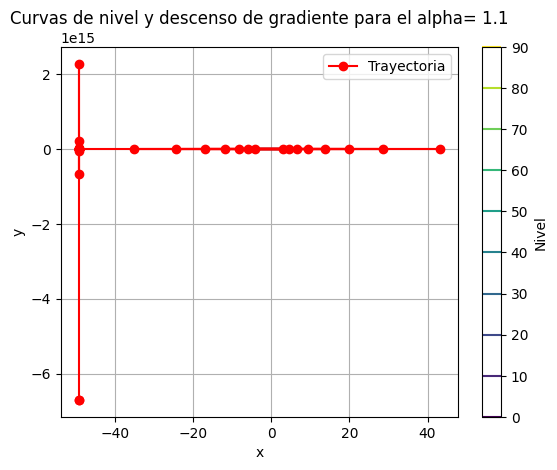

In [ ]:
import matplotlib.pyplot as plt

# Generar datos para las curvas de nivel sobre el cuadrado [-5,5]x[-5,5]
x_fun = np.linspace(-5, 5, 100)
y_fun = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x_fun, y_fun)
coordenadas = [X,Y]
Z = polinomica(coordenadas)

for k in range(len(listado_alpha)):
  # Graficar las curvas de nivel
  plt.contour(X, Y, Z, cmap='viridis')
  plt.colorbar(label='Nivel')

  # Extraer las coordenadas x e y de la lista de puntos
  x_desc = [punto[0] for punto in listado_trayectorias[k]]
  y_desc = [punto[1] for punto in listado_trayectorias[k]]

  # Graficar la trayectoria
  plt.plot(x_desc, y_desc, marker='o', linestyle='-', color='red', label='Trayectoria')

  # Añadir leyenda y etiquetas de los ejes
  plt.legend()
  plt.xlabel("x")
  plt.ylabel("y")
  plt.title("Curvas de nivel y descenso de gradiente para el alpha= " + str(listado_alpha[k]))
  plt.grid(True)

  # Mostrar el gráfico
  plt.show()
  print("\n")

Se puede apreciar a partir de las gráficas de las curvas de nivel y el descenso de gradiente que el algoritmo converge para los casos $\alpha=0.1$ y $\alpha=0.3$, pero diverge para los otros dos. Esto en vista que la trayectoria alcanza puntos del orden de $10^{15}$ en estos casos, por lo que visualmente queda clara la divergencia de la sucesión de puntos. Así mismo, podemos apreciar visualmente que converge más rápido (en menos iteraciones) para $\alpha=0.3$ que para $\alpha=0.1$.

In [ ]:
Q = np.array([[1,0],[0,2]])
valores_propios = np.linalg.eig(Q).eigenvalues

lambda_max = max(valores_propios)
lambda_min = min(valores_propios)

kappa = lambda_max/lambda_min
tasa = (kappa-1)/(kappa+1)
print("La tasa de convergencia del algoritmo para esta función cuadrática es " + str(tasa))

La tasa de convergencia del algoritmo para esta función cuadrática es 0.3333333333333333


El parámetro $\alpha$ afecta la convergencia del algoritmo en tanto que la tasa de convergencia máxima viene dada por $\alpha < \frac{\kappa-1}{\kappa+1}$, que para el caso de la función que estamos trabajando corresponde a $\kappa = \frac{\lambda_{max}}{\lambda_{min}} = \frac{2}{1}=2$, por lo cual $\alpha < \frac{1}{3}$. Por ello, podemos apreciar que el algoritmo efectivamente converge al mínimo $\vec{x}^*=(x^*,y^*)=(-\frac{1}{4},0)$ para el caso en el que $\alpha=0.1$ y $\alpha=0.3$, pero no para valores mayores.

## Función 2

Ahora, se realizará la misma implementación anterior pero utilizando la función:
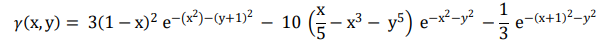


Además, se mantendrá el valor de α = 0.3 y se cambiará el punto de inicio: [-0.5,-1.2], [-2,-1], [1,2] y [2,1].

In [ ]:
import numpy as np
# Definir un listado con los parámetros que se hacen variar
listado_puntos = [[-0.5,-1.2], [-2,-1], [1,2], [2,1]]
listado_trayectorias = []

# Definir una función que implemente la polinómica dada
def exponencial(x):
  return  3*(1-x[0])**2*np.exp(-((x[0])**2)-((x[1]+1))**2)-10*((x[0]/5)-x[0]**3-x[1]**5)*np.exp(-(x[0]**2)-(x[1])**2)-(1/3)*np.exp(-((x[0]+1)**2)-(x[1])**2)

# Obtener las trayectorias seguidas por el algoritmo en cada caso
for a in listado_puntos:
  xk_descenso = descenso_gradiente(exponencial, 0.3, a)
  listado_trayectorias.append(xk_descenso)
  print("Para el punto=" + str(a) + ", el mínimo que arroja el algoritmo está en (x,y)=" + str(xk_descenso[-1]))


Para el punto=[-0.5, -1.2], el mínimo que arroja el algoritmo está en (x,y)=[-2.2484325881633427, 0.671162558035968]
Para el punto=[-2, -1], el mínimo que arroja el algoritmo está en (x,y)=[-2.55221558002939, 0.9096808461608283]
Para el punto=[1, 2], el mínimo que arroja el algoritmo está en (x,y)=[2.5963438099348286, 3.3674497804950496]
Para el punto=[2, 1], el mínimo que arroja el algoritmo está en (x,y)=[3.594259842660854, 1.7425568490787835]


Como se puede observar esta función no es convexa y tiene más de un mínimo. Por esto, de acuerdo con el punto inicial el algoritmo convergerá a alguno de los mínimos locales de la función. Por ejemplo para los puntos [-0.5,-1.2] y [-2,-1], el algoritmo converge al mismo mínimo: [-2.24,0.90]. En cambio para los otros dos puntos inciales el algoritmo converge a otro mínimo local.

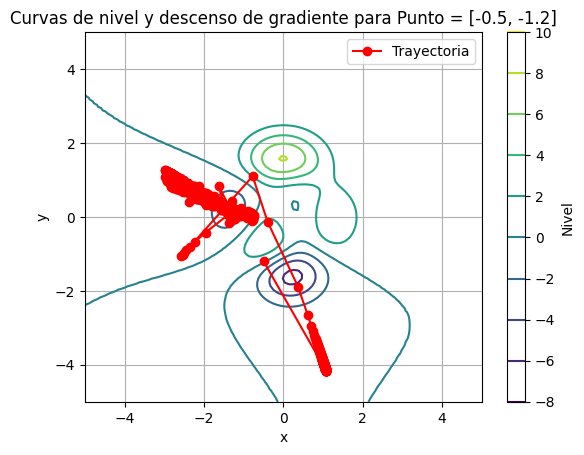

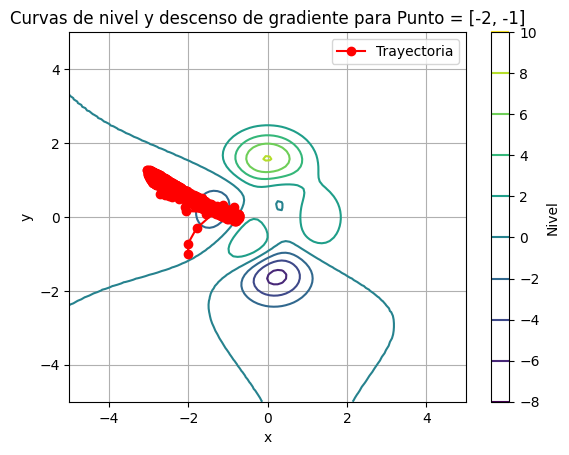

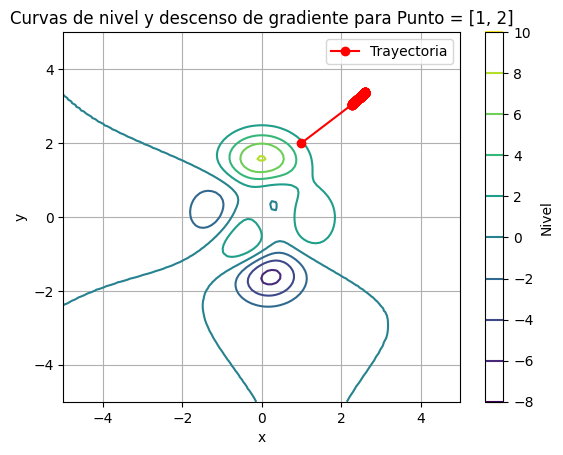

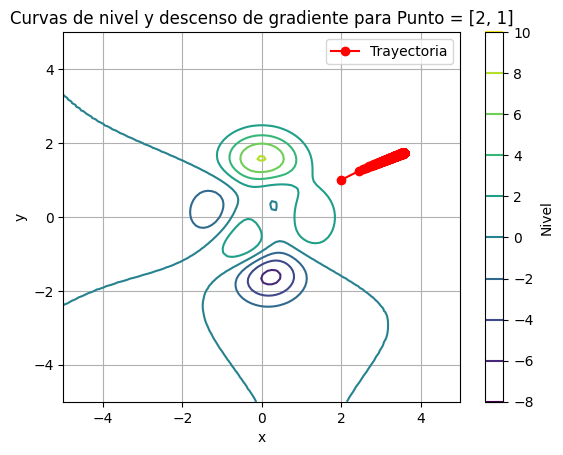

In [ ]:
import matplotlib.pyplot as plt

# Generar datos para las curvas de nivel sobre el cuadrado [-5,5]x[-5,5]
x_fun = np.linspace(-5, 5, 100)
y_fun = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x_fun, y_fun)
coordenadas = [X,Y]
Z = exponencial(coordenadas)

for k in range(len(listado_puntos)):
  # Graficar las curvas de nivel
  plt.contour(X, Y, Z, cmap='viridis')
  plt.colorbar(label='Nivel')

  # Extraer las coordenadas x e y de la lista de puntos
  x_desc = [punto[0] for punto in listado_trayectorias[k]]
  y_desc = [punto[1] for punto in listado_trayectorias[k]]

  # Graficar la trayectoria
  plt.plot(x_desc, y_desc, marker='o', linestyle='-', color='red', label='Trayectoria')

  # Añadir leyenda y etiquetas de los ejes
  plt.legend()
  plt.xlabel("x")
  plt.ylabel("y")
  plt.title("Curvas de nivel y descenso de gradiente para Punto = " + str(listado_puntos[k]))
  plt.grid(True)

  # Mostrar el gráfico
  plt.show()
  print("\n")

En conclusión, la escogencia del punto inicial afecta el mínimo al que se llegará debido a que la función tiene varios mínimos locales. Además, la tasa de convergencia se vera afectada por por el punto de inicio debido a la ortogonalidad del gradiente. De esta manera, llegará más rapido si se situa cercano al eje asociado al valor propio más grande que al más pequeño.